# Happy Deep Learning :)

In [4]:
import tensorflow as tf

node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, tf.float32)

print(node1,node2)


Tensor("Const_4:0", shape=(), dtype=float32) Tensor("Const_5:0", shape=(), dtype=float32)


In [5]:
import tensorflow as tf

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

sess = tf.Session()
outs = sess.run(f)
sess.close()

print("outs = {}".format(outs))

outs = 5


In [6]:
import tensorflow as tf

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adderNode = a+b
sess = tf.Session()

# 1+2 = 3 , 3+7 = 10
print(sess.run(adderNode,{a:[1,3],b:[2,7]}))


[ 3. 10.]


In [8]:
import tensorflow as tf

w = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)

x = tf.placeholder(tf.float32)
linear_model = w*x + b

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print(sess.run(linear_model,{x:[1,2,3,4]}))


[0.         0.3        0.6        0.90000004]


In [7]:
import tensorflow as tf

w = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)

x = tf.placeholder(tf.float32)
linear_model = w*x + b

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print(sess.run(linear_model,{x:[1,2,3,4]}))

# actual output
y = tf.placeholder(tf.float32)

squared_deltas = tf.square(linear_model - y) # actual output - desired output

# A loss function measures how far apart the current model is from the provided data...
# Sum up all the "squared_deltas" and produce a vector named "loss"
loss = tf.reduce_sum(squared_deltas)

print(sess.run(loss, {x:[1,2,3,4],y:[0,-1,-2,-3]}))

[0.         0.3        0.6        0.90000004]
23.66


In [20]:
import tensorflow as tf

w = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)

linear_model = w*x + b
init = tf.global_variables_initializer()
sess = tf.Session()

# sess.run(init)
# print(sess.run(linear_model, {x:[1,2,3,4,5]}))

y = tf.placeholder(tf.float32)
# actual - estimated
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
# print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

# Tensorflow provides optimizers yhat slowly change each variable in order to minimize 
# the loss function...
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess.run(init)

for i in range(1000):
    sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})

# optimize result
print("After optimization w,b is: \n ")
print(sess.run([w,b]))

After optimization w,b is: 
 
[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [8]:
import tensorflow as tf

T, F = 1.0,-1.0

bias = 1.0

train_in = [
    [T,T, bias],
    [T,F, bias],
    [F,T, bias],
    [F,F, bias],
]

train_out = [
    [T],
    [F],
    [F],
    [F],
]

w = tf.Variable(tf.random_normal([3,1]))

def step(x):
    is_greater = tf.greater(x,0)
    as_float = tf.to_float(is_greater)
    doubled = tf.multiply(as_float,2)
    return tf.subtract(doubled, 1)

# matmul = matrix multiplication
output = step(tf.matmul (train_in, w))
# error = train_out - output
error = tf.subtract(train_out, output)
# mean squred error (mse) 
mse = tf.reduce_mean(tf.reduce_mean(error))

# "transpose_a=True" means transpose "train_in" matrix
delta = tf.matmul(train_in, error, transpose_a=True)
train = tf.assign(w, tf.add(w, delta))



sess = tf.Session() 
#use initialize_all_variables or global_variables_initializer
sess.run(tf.global_variables_initializer())

# error = 1 and our 'target' will make it 0
err, target = 1, 0
#err = 1
#target = 0
i , max_i = 0, 10

while err>target and i<max_i:
    i+=1
    err, _ = sess.run([mse, train])
    print('i : ', i, ", mse : ", err)

sess.close()



i :  1 , mse :  0.0


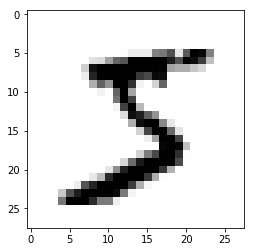

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist # 28x28 images of hand-writing digits 0-9
(x_train,y_train), (x_text,y_test) = mnist.load_data()

# cmap = color map , cm = color map
plt.imshow(x_train[0], cmap = plt.cm.binary)

plt.show()

In [1]:
import tensorflow as tf
# mnist is nothing but a light-weight class which stores the 
# traing validation and testing set as numpy
# from tersorflow.examples.tutorials.mnist import input_data


# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mnist = tf.keras.datasets.mnist
# one_hot=True means, at a time one bit is True
# 000000100
# 001000000

sess = tf.InteractiveSession()

# 724 is single flated 28 by 28 pixels mnist image of handwriting digits
x = tf.placeholder(tf.float32, shape=[None, 784])

# y is also a 2d array where each row is one_hot 10 dimentional vector indicating 
# which digit class the corresponding mnist image belongs to.
y = tf.placeholder(tf.float32, shape=[None, 10])

# initialize weights as zeros and it shape will be 28 * 28 pixels 
# and 10 classess
# 784 input features and 10 outputs. Thus we have 784 * 10 matrics
weights = tf.Variable(tf.zeros([728, 10]))
bias = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y_ = tf.matmul(x,w) + b

cross_entropy = tf.reduce_mean(
  # labels=y means target output
  # logits=y_ means actual/predicted output
  # it will calculate between (target - actual) output and it is going to
  # sum all of them and find out the mean
  tf.nn.softmax_cross_entropy_with_logics(labels=y, logits=y_)
)
# it Optimizes GradientDecent is .5 and minimize the error (cross_entropy)
train_step = tf.train.GradientDecentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
    
    # we are going to load 100 mnist data set (images) each of the iterations
    # each time we load 100 mnist images into the batch (variable)
    batch = mnist.train.next_batch(100)
    
    # its a optimizer and "feed_dict" is to replace the placeholder tensors 
    # 'x' and 'y' with the training example...
    # besically x will contain the input images and y will contain the 
    # actual/desired outputs
    train_step.run(feed_dict= {x: batch[0], y: batch[1]})


# it will compare ... is predected value matches to the actual output ...  
correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))

# we cast the floating point number and take the mean...
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# eval = evaluate
print(accuracy.eval(feed_dict={x:mnist.test.images, y:mnist.test.labels}))

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'w' is not defined

In [49]:
import tensorflow as tf

tf.__version__

'1.13.1'

In [83]:
import tensorflow as tf

initializer = tf.random_normal_initializer(seed = 1)
x = tf.get_variable(name = 'x', shape = [3], dtype = tf.float32, initializer = initializer)
y = tf.Variable(initial_value = x)

diff = tf.subtract(x, y)
avg = tf.reduce_mean(diff)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

print('x0:', sess.run(x))
print('y0:', sess.run(y))

print('x1:', sess.run(x))
print('y1:', sess.run(y))

print('x2:', sess.run(x))
print('y2:', sess.run(y))

print('diff:', sess.run(diff))
print('avg:', sess.run(avg))
sess.close()

ValueError: Variable x already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)


In [28]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for i in range(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print ("Output After Training:")
print (l1)


Output After Training:
[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


In [47]:
import numpy as np

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
            [1],
            [1],
            [0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

print("syn0 (3 * 4 matrix): \n"+ str(syn0) + "\n")
print("syn2 (4 * 1 matrix): \n"+ str(syn1)+ "\n\n")

for j in range(60000):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print ("Error: " + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    # This step is called "backpropagating" and is the namesake of the algorithm.
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    # update weights
    syn1 += np.dot(l1.T,l2_delta)
    syn0 += np.dot(l0.T,l1_delta)


syn0 (3 * 4 matrix): 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]

syn2 (4 * 1 matrix): 
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


Error: 0.49641003190272537
Error: 0.008584525653247159
Error: 0.0057894598625078085
Error: 0.004629176776769985
Error: 0.003958765280273649
Error: 0.0035101225678616766


In [10]:
import plotly.plotly as py
import plotly.graph_objs as go

num_of_points = 20
random_array = np.random.random((num_of_points))

trace1 = go.Scatter(
    x=[j for j in range(len(random_array))],
    y=random_array,
    mode='markers',
    marker = dict(
        size=15,
        color=random_array,
        colorscale='Viridis'
    ),
    name='random array'
)

py.iplot([trace1], filename='numpy-random')

ModuleNotFoundError: No module named 'plotly'

In [22]:
import numpy as np
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]]


In [23]:
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[-0.71922612]
 [-0.60379702]
 [ 0.60148914]]


In [24]:
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[ 0.93652315]
 [-0.37315164]
 [ 0.38464523]]


In [25]:
import numpy as np
np.random.seed(1)
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [26]:
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[-0.39533485]
 [-0.70648822]
 [-0.81532281]]


In [27]:
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[-0.62747958]
 [-0.30887855]
 [-0.20646505]]
